In [1]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image

In [3]:
## Defining the path to the datasets
key_points_data_path = "/truba/home/hkocak/dataHilal/list_landmarks_align_celeba.csv"
images_data_path = "/truba/home/hkocak/dataHilal/img_align_celeba/img_align_celeba"

# Since, the dataset is very huge. Hence, we will only select 10000K images
images_data_size = 100

# Original image dimensions
x_org = 178    # original x value
y_org = 218    # original y value

#Let's scale the images to new dimensions

# New image dimensions
x_ = 100                            # new value of x
image_size_ratio = x_org / y_org    # dimensions ratio
y_ = int(image_size_ratio * x_)     # new value of y

# Image Sizes
original_image_size = (x_org, y_org)
new_image_size = (x_,y_)

# The image size that will be used in the training process
image_size_training = new_image_size


In [4]:
# load the dataset (key points)
df_org = pd.read_csv(key_points_data_path)
df_org = df_org[:images_data_size]

In [5]:
images_data = list()
for idx in range(df_org.shape[0]):
    # Retrieving the path based upon the index
    path = "{}/{}".format(str(images_data_path),str(df_org.iloc[idx].image_id))
    
    # Reading images using PIL library
    image = PIL.Image.open(path).resize(image_size_training)
    image_array = np.asarray(image) / 255
    
    # Appending the images to a list
    images_data.append(image_array)
    
# Converting images_data to an array from list
images_data = np.array(images_data)

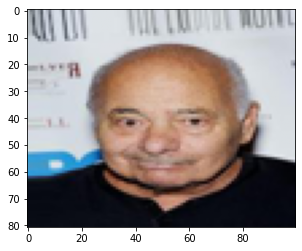

In [6]:
# Plotting a sample image
plt.imshow(images_data[50])

In [7]:
print("Images Data Arrays Shape:", images_data.shape)
print("Key Points Data Shape:", df_org.shape)

Images Data Arrays Shape: (100, 81, 100, 3)
Key Points Data Shape: (100, 11)


In [8]:
df_org.isnull().sum()

image_id        0
lefteye_x       0
lefteye_y       0
righteye_x      0
righteye_y      0
nose_x          0
nose_y          0
leftmouth_x     0
leftmouth_y     0
rightmouth_x    0
rightmouth_y    0
dtype: int64

In [9]:
df_org.describe()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
count,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,69.120000,111.180000,107.75000,111.320000,87.84000,134.860000,71.520000,151.820000,105.410000,152.190000
std,1.719055,1.297861,1.76598,1.171031,6.50209,4.809544,3.337815,1.855268,3.522209,1.762087
min,66.000000,105.000000,101.00000,106.000000,65.00000,119.000000,64.000000,147.000000,97.000000,150.000000
25%,68.000000,111.000000,107.00000,111.000000,85.00000,132.000000,69.000000,151.000000,103.000000,151.000000
50%,69.000000,111.000000,108.00000,111.000000,88.00000,136.000000,72.000000,152.000000,105.000000,152.000000
75%,70.000000,112.000000,109.00000,112.000000,92.00000,138.000000,73.000000,153.000000,108.000000,153.000000
max,76.000000,114.000000,112.00000,114.000000,108.00000,145.000000,80.000000,158.000000,114.000000,159.000000


# Reading Images

In [11]:
# function to read images based on index
def image_array(index, size=image_size_training, path=images_data_path):
    """
    This functions is for converting images to arrays to deal with it in the model.
    
    Input:  index of the image that we want to convert to array
            size of the image that we want for the array of the image
            path of the images data to get the image
            
    Output: the image array as numpy array
    """
    # to get the path based on index
    path = "{}/{}".format(str(path),str(df_org.iloc[index].image_id))
    
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)
    
    return image_array

In [12]:
# function to get a list of all key points of the face
def image_key_points_list(index, df = df_org):
    """
    This function for getting the key points on the face as list to deal with it in plotting sections
    """
    # box dictionary
    points_list = [df.iloc[index].lefteye_x,
                   df.iloc[index].lefteye_y,
                   df.iloc[index].righteye_x,
                   df.iloc[index].righteye_y,
                   df.iloc[index].nose_x,
                   df.iloc[index].nose_y,
                   df.iloc[index].leftmouth_x,
                   df.iloc[index].leftmouth_y,
                   df.iloc[index].rightmouth_x,
                   df.iloc[index].rightmouth_y]
    
    return points_list

In [ ]:
# function to plot the image with green box around the faces
def plotting_image_with_box(index, df = df_org, size=original_image_size):
    """
    This function for plotting the image with points on facial features and box around the face
    """
    test_image = image_array(index, size)
    points_list = image_key_points_list(index, df)
    
    # face points
    #we need just eyes**
    le_x, le_y, re_x, re_y = points_list[0], points_list[1], points_list[2], points_list[3]
    
    
    n_x, n_y = points_list[4], points_list[5]
    lm_x, lm_y, rm_x, rm_y = points_list[6], points_list[7], points_list[8], points_list[9]
    
    # Create figure and axes
    fig, ax = plt.subplots()
    # plot the image
    ax.imshow(test_image)
    # plot the points on the face
    # ax.plot([le_x,re_x,n_x,lm_x,rm_x], [le_y,re_y,n_y,lm_y,rm_y], 'bo-')
    
    # plot the box around the face
    width = abs(le_x-re_x-40)
    height = abs(le_x-100)
    rect = patches.Rectangle((le_x-20, le_y-20), width, height, linewidth=4, edgecolor='g', facecolor='none')
    ax.add_patch(rect);
    
    #plotting the image with facial key points
plotting_image_with_box(54)